## Name: Uras Ayanoglu - PTIVIS21S 
## Number: 2203334 

# WEEK 10 Practice - Working with BST

In this week practice, you can use the Python implementation from lectures to complete the tasks given below.

In [63]:
from graphviz import Digraph
from IPython.display import SVG
from collections import deque


'''
graphviz and ipython.display are used to visualize the generated tree.

This code defines a Node data structure with attributes value, left and right. Value is the integer value stored in node. 
Attribute left is a pointer to the left child of a node, once initialized it's None.
Attribute right is a pointer to the right child, correspondingly.

The Binary Search Tree (BST) data structure is a tree consisting of nodes. The left sub-tree consists of all values less than 
the value of the node, the right sub-tree of all values greater than the current node value.

The BST data structure has functions:
* add a node
* delete a node
* search a node
* preorder traversal (DF traversal)
* inorder traversal (DF traversal)
* postorder traversal (DF traversal)
* print for all traverlsal types
* visualise for graphical print
'''

class Node:
    def __init__(self,value):
        self.value = value
        self.left = None
        self.right = None
        
class BST:
    def __init__(self):
        self.root = None
        
    def _add(self, current, value):
        
        if self.root == None:
            self.root = Node(value)
        else:
            if value < current.value:
                if current.left == None:
                    current.left = Node(value)
                else:
                    self._add(current.left, value)
            else:
                if current.right == None:
                    current.right = Node(value)
                else:
                    self._add(current.right, value)
      
    def add(self, value):
        new_node = Node(value)
        
        if self.root == None:
            self.root = new_node
            
        else:
             self._add(self.root, value)
    
    def delete(self,root, key):
        """
        Delete a node with the given key from a binary search tree.

        :param root: The root of the binary search tree.
        :param key: The value of the node to be deleted.
        :return: The new root of the binary search tree.
        """
        if not root:
            return None

        if key < root.value:
            root.left = self.delete(root.left, key)
        elif key > root.value:
            root.right = self.delete(root.right, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            else:
                temp = self.find_min(root.right)
                root.value = temp.value
                root.right = self.delete(root.right, temp.value)

        return root

    def find_min(self,root):
        while root.left:
            root = root.left
        return root
    
    def find_max(self,root):
        while root.right:
            root = root.right
        return root
    
    def find_height(self,root):
        if root is None:
            return -1
        left_height = self.find_height(root.left)
        right_height = self.find_height(root.right)
        return 1 + max(left_height, right_height)
    
    def find_depth(self,root, key, depth=0):
        if root is None:
            return -1
        if root.value == key:
            return depth
        if root.value > key:
            return self.find_depth(root.left, key, depth+1)
        else:
            return self.find_depth(root.right, key, depth+1)
        
    # returns a node whose value == input value
    # if no node with input value is found, None is returned
    def _search(self, node, value):
        if node is None or node.value == value:
            return node          
        
        if value < node.value:
            return self._search(node.left, value)
        else:
            return self._search(node.right,value) 
        
    # prints the result of search: does a node with input value exist in the BST or not                   
    def search(self, value):
        result = self._search(self.root,value)
        
        if result is None:
            print(f"NO node with value {value} found in BST!")
        elif result.value == value:
            print(f"YES, a node with value {value} found in BST!")
    
    
    # visiting = print the value of the node
    def visit(self, node):
        print(node.value)
    
    # There are different types of in-depth traversals: pre-order, in-order and post-order
    # Here's an algorithm for all those
    
    # pre-order traversal
    def preorder(self, current):
        if current is not None:
            self.visit(current)
            self.preorder(current.left)
            self.preorder(current.right)
        
    def preprint(self):
        self.preorder(self.root)

    # inorder traversal
    def inorder(self, current):
        if current is not None:
            self.inorder(current.left)
            self.visit(current)
            self.inorder(current.right)
    
    def inprint(self):
        self.inorder(self.root)

    #postorder traversal
    def postorder(self, current):
        if current is not None:
            self.postorder(current.left)
            self.postorder(current.right)
            self.visit(current)
            
    def postprint(self):
        self.postorder(self.root)
    
    def level_order_traversal(self,root):
        """
        Perform level-order traversal on a binary tree.

        :param root: The root of the binary tree.
        :return: A list containing the values in the binary tree in level-order traversal order.
        """
        if not root:
            return []

        res = []
        q = deque([root])

        while q:
            level_size = len(q)
            level_vals = []
            for _ in range(level_size):
                node = q.popleft()
                level_vals.append(node.value)
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
            res.append(level_vals)

        return res
    # Write an algorithm for finding the predecessor of a node in BST
    def predecessor(self,root, key):
        if root is None:
            return None
        if root.value == key:
            if root.left:
                return self.find_max(root.left)
            else:
                return None
        if root.value > key:
            return self.predecessor(root.left, key)
        else:
            right = self.predecessor(root.right, key)
            if right:
                return right
            else:
                return root
            
    # Write an algorithm for finding the successor of a node in BST
    def successor(self,root, key):
        if root is None:
            return None
        if root.value == key:
            if root.right:
                return self.find_min(root.right)
            else:
                return None
        if root.value < key:
            return self.successor(root.right, key)
        else:
            left = self.successor(root.left, key)
            if left:
                return left
            else:
                return root
            
            
    def levelprint(self):
        levellist = self.level_order_traversal(self.root)
        for item in levellist:
            print(item)
                
    # visualize the BST with graphviz digraph
    def visualize(self):
        dot = Digraph(comment='Binary Tree')
        
        def add_nodes_edges(node):
            if node is None:
                return
            dot.node(str(node.value), str(node.value))
            if node.left is not None:
                dot.edge(str(node.value), str(node.left.value))
                add_nodes_edges(node.left)
            if node.right is not None:
                dot.edge(str(node.value), str(node.right.value))
                add_nodes_edges(node.right)
        
        add_nodes_edges(self.root)
        return SVG(dot.pipe(format='svg'))


# Driver code here!

# Task 1 - Create a BST object and add values to BST

In this task, you should first generate an instance of a new BST.

Then add elements **7, 10, 3, 6, 12, 15, 2, 5, 11** to the BST in this order.

Use the *visualize* algorithm to show the generated BST.

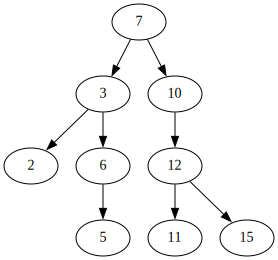

In [64]:
# Create a BST object and add elements of 7,10,3,6,12,15,2,5,11

bst = BST()
bst.add(7)
bst.add(10)
bst.add(3)
bst.add(6)
bst.add(12)
bst.add(15)
bst.add(2)
bst.add(5)
bst.add(11)

bst.visualize()

# Task 2 - Search items in BST

In this task, you should search for this items in your BST:
* 6 (positive result)
* 5 (positive result)
* 13 (negative result)
* 4 (negative result)

You should also search for the minimum and maximum value in the tree using the tree search / traversal algorithms. In other words, write an algorithm that returns the minimum value of the tree, and another algorithm for finding the maximum value.

In [65]:
# Search for 6, 5, 13, and 4 in bst object

bst.search(6)
bst.search(5)
bst.search(13)
bst.search(4)

# An algorithm that searches the maximum value in BST and returns the value

print(f"\nMin value in BST is:", bst.find_min(bst.root).value)

print(f"Max value in BST is:", bst.find_max(bst.root).value) # I added the find_max function in BST class!


YES, a node with value 6 found in BST!
YES, a node with value 5 found in BST!
NO node with value 13 found in BST!
NO node with value 4 found in BST!

Min value in BST is: 2
Max value in BST is: 15


# Task 3 - Depth and height algorithm

An algorithm telling the height or the depth of a node are still missing from the BST implementation.

Write an algorithm for those and demonstrate the use of those algorithms for the root, a leaf and some internal node in your BST.

In [66]:
# I added the depth and height algorithms in BST class!

print(f"\nHeight of BST is:", bst.find_height(bst.root))

print(f"Depth of 6 is:", bst.find_depth(bst.root, 6))


Height of BST is: 3
Depth of 6 is: 2


# Task 4 - Deleting nodes from the BST

Choose three nodes from your tree such that:
* one of the nodes is a leaf
* one of the nodes has only one child
* one of the nodes has two children

Delete those nodes and after each deletion, visualise the new BST with the visualize() algorithm.
Describe, with your own words, how the deletion algorithm works in these three different cases.

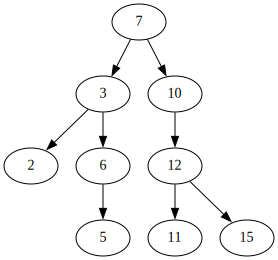

In [67]:
another_bst = BST()
another_bst.add(7)
another_bst.add(10)
another_bst.add(3)
another_bst.add(6)
another_bst.add(12)
another_bst.add(15)
another_bst.add(2)
another_bst.add(5)
another_bst.add(11)

another_bst.visualize()



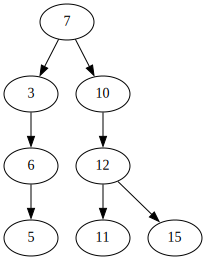

In [68]:
# Deleting a leaf node
another_bst.delete(another_bst.root, 2)
another_bst.visualize()



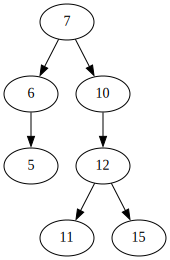

In [69]:
# Deleting a node with one child
another_bst.delete(another_bst.root, 3)
another_bst.visualize()



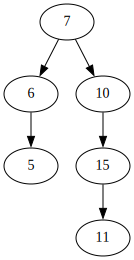

In [70]:
# Deleting a node with two children
another_bst.delete(another_bst.root, 12)
another_bst.visualize()

# Task 5 Predecessor and successor

**Predecessor of a node** is the node visited just before this node in inorder traversal.

**Successor of a node** is the node visited just after this node in inorder traversal.

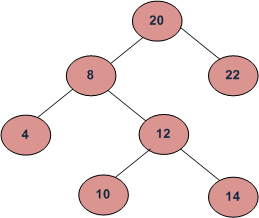

For example, in the above graph, the inorder successor of 8 is 10, whereas the predecessor is 4.

The inorder successor of 14 is 20, whereas the inorder predecessor is 12.

Write an algorithm for finding the predecessor and an algorithm for finding the successor of a given node.

In [71]:
# Algorithms for finding the predecessor and successor of a node in BST are also added in BST class!

print(f"\nPredecessor of 6 is:", bst.predecessor(bst.root, 6).value)
print(f"Successor of 6 is:", bst.successor(bst.root, 6).value)



Predecessor of 6 is: 5
Successor of 6 is: 7
